# Titanic_Data_Analysis #

### Importing Library ###

In [1]:
import pandas as pd

### Loading Data ###

In [2]:
data = pd.read_excel("Titanic DS (task1).xlsx")

In [3]:
#to display first 5 rows
data.head()

,pclass,survived,name,Unnamed: 3,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",NaN,female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",NaN,male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",NaN,female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",NaN,male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",NaN,female,25.0000,1,2,113781,151.5500,S


In [4]:
#to display last 5 rows
data.tail()

,pclass,survived,name,Unnamed: 3,sex,age,sibsp,parch,ticket,fare,embarked
1304,3,0,"Zabour, Miss. Hileni",NaN,female,14.5,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",NaN,female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",NaN,male,26.5,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",NaN,male,27.0,0,0,2670,7.2250,C
1308,3,0,"Zimmerman, Mr. Leo",NaN,male,29.0,0,0,315082,7.8750,S


In [5]:
# to view number of rows and columns
data.shape

(1309, 11)

### checking duplicates ###

In [6]:
duplicates = data.duplicated()
print(duplicates.sum())

0


In [7]:
#to view column names
data.columns

Index(['pclass', 'survived', 'name', 'Unnamed: 3', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

### Feature Description ###

In [8]:
#removing unwanted columns
data = data.drop(['Unnamed: 3'], axis = 1)

In [9]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


### checking the data type of Features ###

In [10]:
data.dtypes

pclass        int64
survived      int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
embarked     object
dtype: object

### Statistics of the Titanic Dataset ###

In [11]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


### checking null values ###

In [12]:
data.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

### DataCleaning ###

#### Handling Missing values ####

In [13]:
data["name"].value_counts()

name
Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: count, Length: 1307, dtype: int64

In [14]:
data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [15]:
# Split the 'name' column to extract the part after the comma
data['name_split'] = data['name'].apply(lambda x: x.split(','))
print(data['name_split'][0])

['Allen', ' Miss. Elisabeth Walton']


In [16]:
data['name_split'] = data['name'].apply(lambda x: x.split(',')[1])
print(data['name_split'][0])

 Miss. Elisabeth Walton


In [17]:
# Split the extracted part to get the courtesy title and remove any leading/trailing spaces
data['courtesy_title'] = data['name_split'].apply(lambda x: x.split('.')[0].strip())
data['courtesy_title'][0]

'Miss'

In [18]:
data['courtesy_title'].value_counts()

courtesy_title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: count, dtype: int64

#### courtesy title description ####

In [19]:
# Define the mapping
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Mr',
    'Rev': 'Mr',
    'Col': 'Mr',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Major': 'Mr',
    'Capt': 'Mr',
    'Sir': 'Mr',
    'Dona': 'Mrs',
    'Jonkheer': 'Mr',
    'the Countess': 'Mrs',
    'Don': 'Mr',
    'Mme': 'Mrs',
    'Lady': 'Mrs'
}

In [20]:
# Apply the mapping
data['courtesy_title'] = data['courtesy_title'].map(title_mapping)

In [21]:
data['courtesy_title'].value_counts()

courtesy_title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [22]:
# Find the mean vales of 'Age' group by 'Title'
mean_age_by_title = data.groupby(['courtesy_title']).age.mean()

In [23]:
def fill_age(row):
    if pd.isnull(row['age']):
        return mean_age_by_title[row['courtesy_title']]
    else:
        return row['age']


In [25]:
data['age'] = data.apply(fill_age, axis=1)

In [26]:
data.isnull().sum()

pclass            0
survived          0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
embarked          2
name_split        0
courtesy_title    0
dtype: int64

In [27]:
# Fill missing value with mode in "embarked"
data['embarked'].fillna(data['embarked'].mode()[0], inplace = True)

In [28]:
# Fill missing fare with median
data['fare'].fillna(data['fare'].median(), inplace = True)

In [29]:
data.isnull().sum()

pclass            0
survived          0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
embarked          0
name_split        0
courtesy_title    0
dtype: int64

In [30]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,name_split,courtesy_title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,Miss. Elisabeth Walton,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,Master. Hudson Trevor,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,Miss. Helen Loraine,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,Mr. Hudson Joshua Creighton,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs


In [31]:
# Create the new column 'ageGroup' using conditions
data['ageGroup'] = 'Unknown'  # Default value

data.loc[data['age'] < 18, 'ageGroup'] = 'Young'
data.loc[(data['age'] >= 18) & (data['age'] < 40), 'ageGroup'] = 'Adult'
data.loc[(data['age'] >= 40) & (data['age'] < 56), 'ageGroup'] = 'Middle age'
data.loc[data['age'] >= 56, 'ageGroup'] = 'Senior'
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,name_split,courtesy_title,ageGroup
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,Miss. Elisabeth Walton,Miss,Adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,Master. Hudson Trevor,Master,Young
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,Miss. Helen Loraine,Miss,Young
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,Mr. Hudson Joshua Creighton,Mr,Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Adult


In [34]:
# Save the cleaned DataFrame to a CSV file
data.to_csv('cleaned_data(task1).csv', index=True)

In [35]:
# 1. Total number of Passengers
total_passengers = data.shape[0]
total_passengers

1309

In [34]:
# 2. Number of surviving Passengers
data["survived"].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [35]:
num_survived = data[data['survived'] == 1].shape[0]
print(f"Number of surviving passengers: {num_survived}")

Number of surviving passengers: 500


C:\Users\shiny\AppData\Local\Temp\ipykernel_26736\706509437.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=survived_counts.index, y=survived_counts.values, palette=['salmon', 'skyblue'])


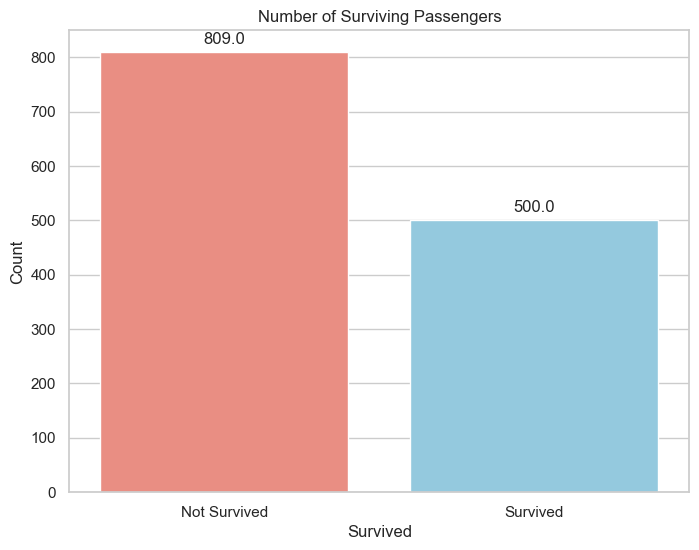

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
survived_counts = data["survived"].value_counts()  

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=survived_counts.index, y=survived_counts.values, palette=['salmon', 'skyblue'])

# Adding values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{height}', 
            ha='center', va='bottom', fontsize=12)

plt.title("Number of Surviving Passengers")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()



In [36]:
# 3. Number of died Passengers
num_died = total_passengers - num_survived
num_died

809

In [37]:
# 4. Total Fare Price
total_fare = data['fare'].sum()
total_fare 

np.float64(43564.9411)

In [38]:
# Convert to dollar format using f-strings
total_fare_dollars = f"${total_fare:,.2f}"
print(f"Total fare in dollars: {total_fare_dollars}")

Total fare in dollars: $43,564.94


In [39]:
# 5. Gender based Classification
gender_classification = data['sex'].value_counts()
gender_classification 

sex
male      843
female    466
Name: count, dtype: int64

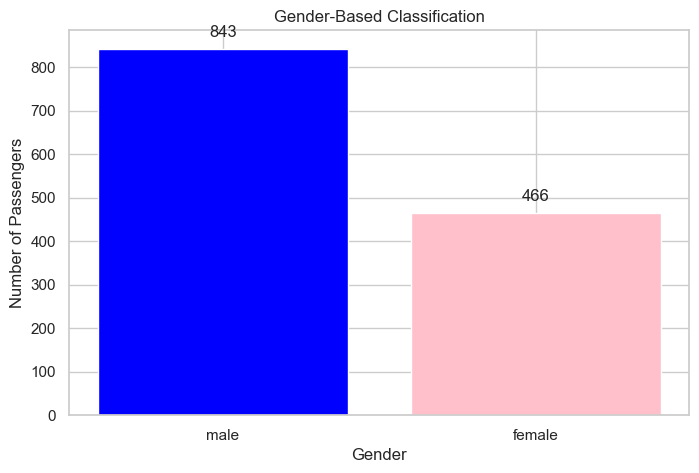

In [56]:
# Example data
gender_classification = {
    'male': 843,
    'female': 466
}

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(gender_classification.keys(), gender_classification.values(), color=['blue', 'pink'])

# Adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height}', 
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Gender-Based Classification')
plt.show()


In [40]:
# 6. Passenger distribution by class
class_distribution = data['pclass'].value_counts()
class_distribution

pclass
3    709
1    323
2    277
Name: count, dtype: int64

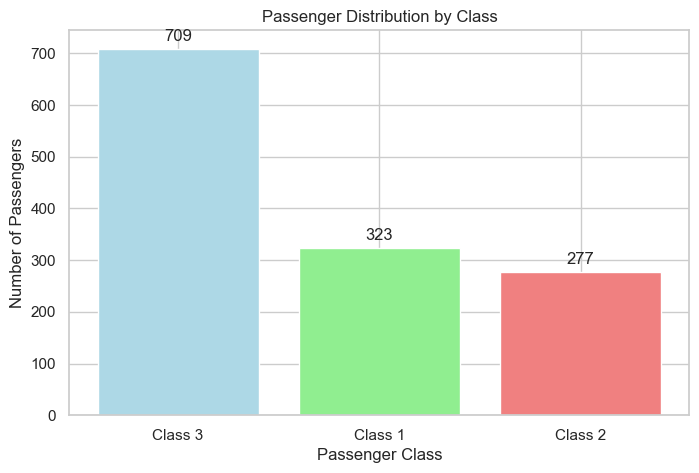

In [55]:
# Example data
class_distribution = {
    'Class 3': 709,
    'Class 1': 323,
    'Class 2': 277
}

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(class_distribution.keys(), class_distribution.values(), color=['lightblue', 'lightgreen', 'lightcoral'])

# Adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height}', 
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Distribution by Class')
plt.show()


In [41]:
# 7. Survival & Mortality percentage
survival_percentage = (num_survived / total_passengers) * 100
mortality_percentage = (num_died / total_passengers) * 100
print(survival_percentage)
print(mortality_percentage)

38.19709702062643
61.80290297937356


In [42]:
formatted_value1 = f"{survival_percentage:.2f}"
print(f"Formatted value for survival persentage: {formatted_value1}")
formatted_value2 = f"{mortality_percentage:.2f}"
print(f"Formatted value for mortality_percentage: {formatted_value2}")


Formatted value for survival persentage: 38.20
Formatted value for mortality_percentage: 61.80


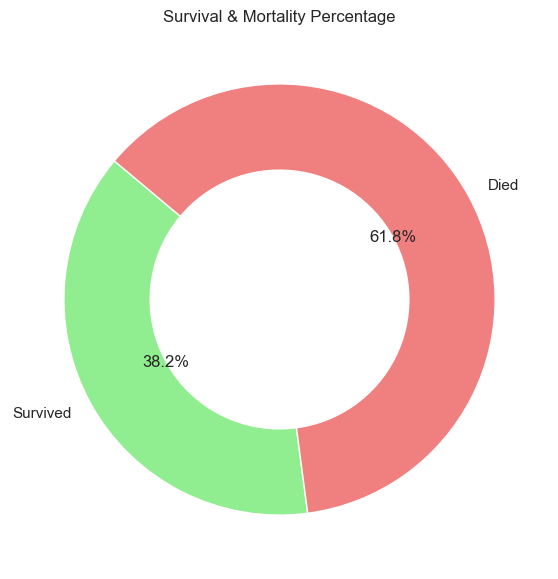

In [51]:
# Example data
survival_percentage = 38.20
mortality_percentage = 61.80

# Data for the pie chart
labels = ['Survived', 'Died']
sizes = [survival_percentage, mortality_percentage]
colors = ['lightgreen', 'lightcoral']

# Plotting
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops=dict(width=0.4))
plt.title('Survival & Mortality Percentage')
plt.show()


In [43]:
#8. Group by gender and count the number of survivors
survival_by_gender = data[data['survived'] == 1].groupby('sex')['survived'].count()

print(survival_by_gender)

sex
female    339
male      161
Name: survived, dtype: int64


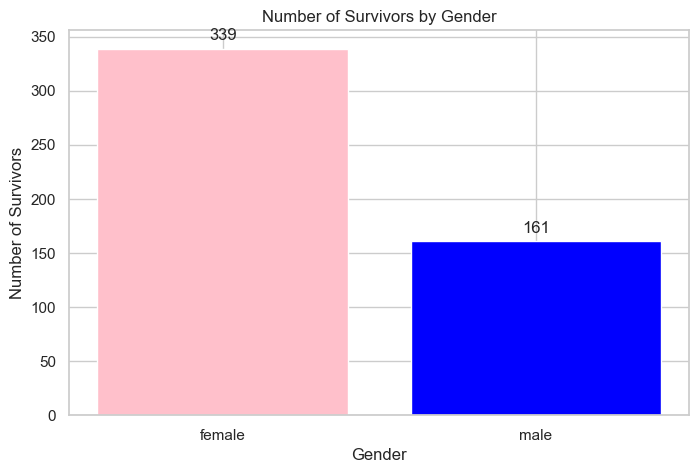

In [54]:
# Example data
survival_by_gender = {
    'female': 339,
    'male': 161
}

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(survival_by_gender.keys(), survival_by_gender.values(), color=['pink', 'blue'])

# Adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{height}', 
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Gender')
plt.show()


In [44]:
9.# Group by gender and count the number of mortalities
mortality_by_gender = data[data['survived'] == 0].groupby('sex')['survived'].count()

print(mortality_by_gender)

sex
female    127
male      682
Name: survived, dtype: int64


C:\Users\shiny\AppData\Local\Temp\ipykernel_26736\3532454729.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(mortality_by_gender.keys()), y=list(mortality_by_gender.values()), palette=['pink', 'blue'])


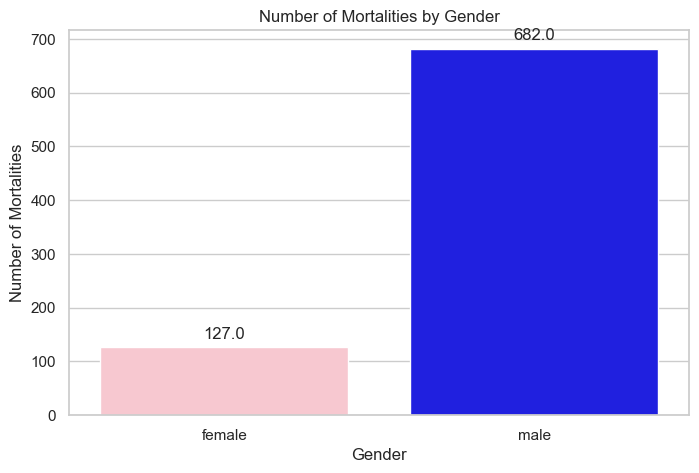

In [58]:
# Example data
mortality_by_gender = {
    'female': 127,
    'male': 682
}

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(mortality_by_gender.keys()), y=list(mortality_by_gender.values()), palette=['pink', 'blue'])

# Adding values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{height}', 
            ha='center', va='bottom', fontsize=12)

plt.xlabel('Gender')
plt.ylabel('Number of Mortalities')
plt.title('Number of Mortalities by Gender')
plt.show()


In [61]:
# 10. Passenger Distribution based on Age Group
# Creating a Categorical variable for Ages

data['ageGroup'].loc[(data['age'] < 18)] = 'Young'
data['ageGroup'].loc[(data['age'] >= 18) & (data['age'] < 40)] = 'Adult'
data['ageGroup'].loc[(data['age'] >= 40) & (data['age'] < 56)] = 'Middle age'
data['ageGroup'].loc[(data['age'] >= 56)] = 'Senior'

C:\Users\shiny\AppData\Local\Temp\ipykernel_26736\179654149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ageGroup'].loc[(data['age'] < 18)] = 'Young'
C:\Users\shiny\AppData\Local\Temp\ipykernel_26736\179654149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ageGroup'].loc[(data['age'] >= 18) & (data['age'] < 40)] = 'Adult'
C:\Users\shiny\AppData\Local\Temp\ipykernel_26736\179654149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [46]:
# 10. Passenger Distribution based on Age Group
# Count the number of passengers in each AgeGroup and reset index
passenger_distribution_by_age_group = data['ageGroup'].value_counts().reset_index()

# Rename columns
passenger_distribution_by_age_group.columns = ['ageGroup', 'Count']

print(passenger_distribution_by_age_group)

     ageGroup  Count
0       Adult    902
1  Middle age    187
2       Young    162
3      Senior     58


C:\Users\shiny\AppData\Local\Temp\ipykernel_26736\2186760085.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ageGroup', y='Count', data=df_age_distribution, palette='viridis')


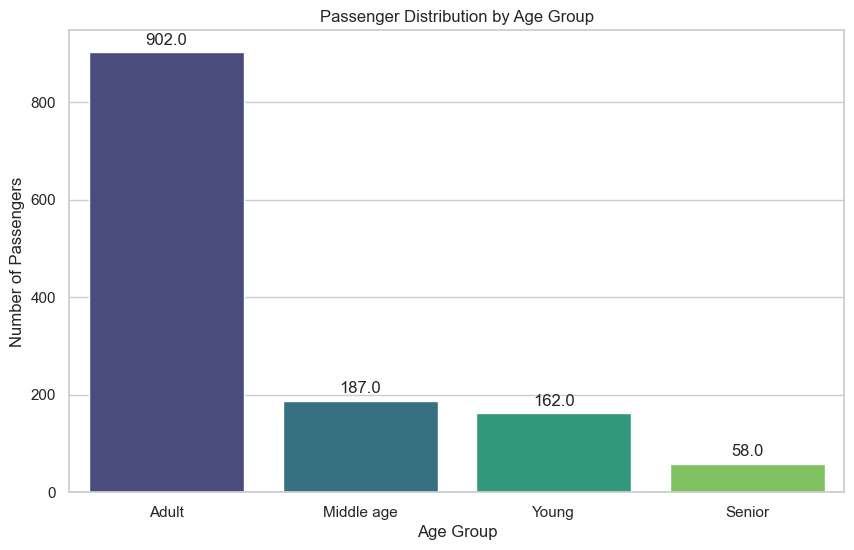

In [62]:
passenger_distribution_by_age_group = {
    'Adult': 902,
    'Middle age': 187,
    'Young': 162,
    'Senior': 58
}

# Convert to DataFrame for plotting
import pandas as pd
df_age_distribution = pd.DataFrame(list(passenger_distribution_by_age_group.items()), columns=['ageGroup', 'Count'])

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ageGroup', y='Count', data=df_age_distribution, palette='viridis')

# Adding values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{height}', 
            ha='center', va='bottom', fontsize=12)

plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.title('Passenger Distribution by Age Group')
plt.show()
